In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('sales_data.csv')
print(df.head())

         Date     Product  Quantity  Price Customer_ID Region  Total_Sales
0  2024-01-01       Phone         7  37300     CUST001   East       261100
1  2024-01-02  Headphones         4  15406     CUST002  North        61624
2  2024-01-03       Phone         2  21746     CUST003   West        43492
3  2024-01-04  Headphones         1  30895     CUST004   East        30895
4  2024-01-05      Laptop         8  39835     CUST005  North       318680


In [6]:
df.isna().sum()
df.drop_duplicates()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680
...,...,...,...,...,...,...,...
95,2024-04-05,Tablet,8,20770,CUST096,North,166160
96,2024-04-06,Headphones,1,7647,CUST097,West,7647
97,2024-04-07,Tablet,5,27196,CUST098,East,135980
98,2024-04-08,Monitor,1,30717,CUST099,North,30717


calculating metrics

In [27]:
df['Total_Sales'].mean()


np.float64(123650.48)

In [26]:
df['Total_Sales'].median()


np.float64(97955.5)

In [25]:
df['Total_Sales'].mode()

0       6540
1       6720
2       7148
3       7647
4      10544
       ...  
95    333992
96    349510
97    350888
98    363870
99    373932
Name: Total_Sales, Length: 100, dtype: int64

In [28]:
skew = df['Total_Sales'].skew()
if skew > 0:
    print(f"The distribution is positively skewed with the value {skew}.")
elif skew < 0:
    print(f"The distribution is negatively skewed with the value {skew} .")
else:
    print("The distribution is symmetric.") 

The distribution is positively skewed with the value 0.8784922285609769.


In [29]:
kurtosis = df['Total_Sales'].kurt()
print(f"The kurtosis of the Total_Sales distribution is {kurtosis}.") 

The kurtosis of the Total_Sales distribution is -0.18281709321454587.


Counting based metrics

In [31]:
df.count()

Date           100
Product        100
Quantity       100
Price          100
Customer_ID    100
Region         100
Total_Sales    100
dtype: int64

In [34]:
df['Total_Sales'].value_counts()

Total_Sales
261100    1
89620     1
70048     1
349510    1
151712    1
         ..
209400    1
107118    1
45467     1
304465    1
116880    1
Name: count, Length: 100, dtype: int64

Corelation analysis

In [37]:
df.corr(numeric_only=True)

,Quantity,Price,Total_Sales
Quantity,1.000000,0.008014,0.688107
Price,0.008014,1.000000,0.646131
Total_Sales,0.688107,0.646131,1.000000


Visualisation---- Line Chart

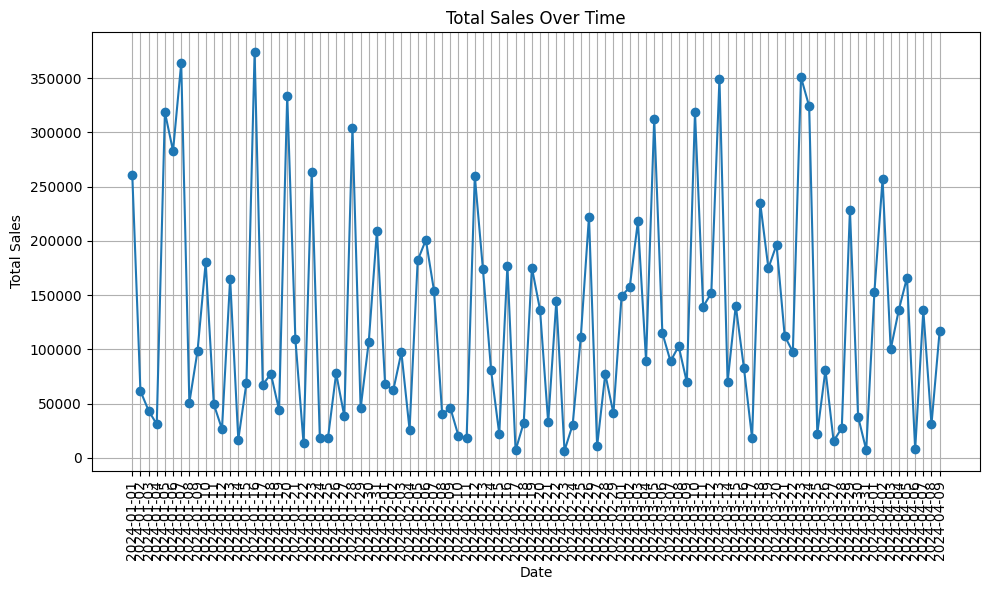

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Total_Sales"], marker='o')
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Sales Performance Report</title>
    <style>
        body { font-family: sans-serif; line-height: 1.6; color: #333; max-width: 600px; margin: 20px; }
        h2 { color: #2c3e50; border-bottom: 2px solid #eee; padding-bottom: 10px; }
        .highlight { font-weight: bold; color: #e67e22; }
    </style>
</head>
<body>
    <h2>Sales Performance Report</h2>
    <p>The data reveals highly volatile <strong>Total Sales</strong> from January through April 2024.</p>
    <ul>
        <li><span class="highlight">Peaks:</span> Mid-January and March recorded highs exceeding <strong>$350,000</strong>.</li>
        <li><span class="highlight">Troughs:</span> Frequent drops to near-zero suggest inconsistent demand or data reporting gaps.</li>
    </ul>
    <p>Overall, the trend remains erratic with no definitive growth trajectory established during this period.</p>
</body>
</html>

Visualisation ---- Bar Chart

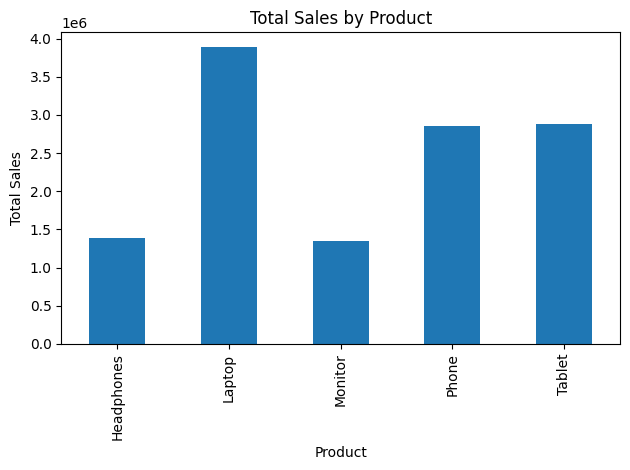

In [57]:
plt.figure()
df.groupby('Product')['Total_Sales'].sum().plot(kind='bar')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Product Sales Analysis</title>
    <style>
        body { font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6; color: #333; max-width: 600px; margin: 30px auto; padding: 20px; border: 1px solid #eee; border-radius: 8px; }
        h2 { color: #1a5fb4; border-bottom: 2px solid #1a5fb4; padding-bottom: 10px; }
        .highlight { font-weight: bold; color: #d1403f; }
        .stat-box { background-color: #f8f9fa; padding: 15px; border-left: 5px solid #1a5fb4; margin: 15px 0; }
    </style>
</head>
<body>
    <h2>Total Sales by Product Report</h2>
    <div class="stat-box">
        <p><strong>Laptops</strong> are the top performers, reaching nearly <span class="highlight">$3.9M</span> in sales. <strong>Tablets</strong> and <strong>Phones</strong> follow as strong mid-tier contributors, each generating approximately $2.9M.</p>
    </div>
    <p>In contrast, <strong>Headphones</strong> and <strong>Monitors</strong> represent the lowest revenue streams, both falling below the $1.5M mark.</p>
</body>
</html>

Histogram

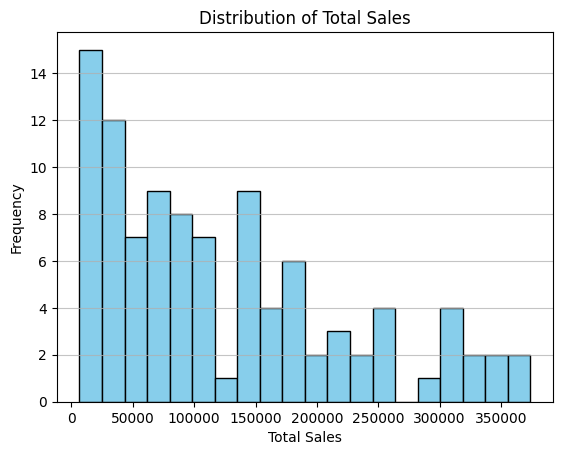

In [67]:
plt.figure()
plt.hist(df["Total_Sales"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sales Report</title>
    <style>
        body{font-family:'Segoe UI',sans-serif;line-height:1.4;color:#333;max-width:500px;margin:10px auto;padding:15px;border:1px solid #ddd;border-radius:8px;box-shadow:0 2px 5px rgba(0,0,0,0.1)}
        h2,h3{margin:5px 0;color:#2c3e50;border-bottom:1px solid #3498db}
        h3{color:#2980b9;border:0;font-size:1.1em}
        .sh{font-weight:700;color:#e67e22}
        hr{border:0;border-top:1px solid #eee;margin:10px 0}
        footer{font-style:italic;font-size:0.9em;color:#666}
    </style>
</head>
<body>
    <h2>Sales Analysis</h2>
    <h3>Revenue</h3>
    <p><strong>Laptops</strong> lead at <span class="sh">$3.9M</span>. Tablets/Phones follow ($2.9M), while Headphones/Monitors lag below $1.5M.</p>
    <hr>
    <h3>Distribution</h3>
    <p>Data is <strong>right-skewed</strong>; most transactions are low-value (<span class="sh">$0-$50k</span>), with few reaching the $350k peak.</p>
    <hr>
    <footer>Laptops drive volume; business relies on high-frequency, low-value sales.</footer>
</body>
</html>

Scatter Plot

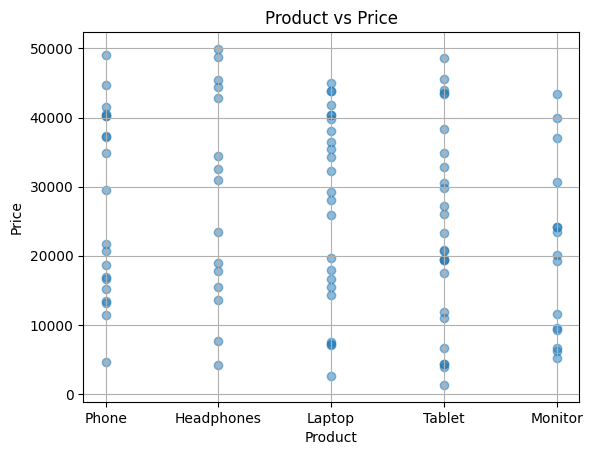

In [62]:
plt.figure()
plt.scatter(df["Product"], df["Price"], alpha=0.5)
plt.title("Product vs Price")
plt.xlabel("Product")
plt.ylabel("Price")
plt.grid()
plt.show()

<!DOCTYPE html><html><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width,initial-scale=1"><title>Sales Summary</title><style>body{font:13px/1.4 sans-serif;color:#333;max-width:500px;margin:5px auto;padding:10px;border:1px solid #ddd;border-radius:5px;box-shadow:0 2px 4px #0001}h2,h3{margin:4px 0;color:#2c3e50;border-bottom:1px solid #3498db}h3{color:#2980b9;border:0;font-size:1.1em}.s{font-weight:700;color:#e67e22}hr{border:0;border-top:1px solid #eee;margin:8px 0}footer{font-style:italic;font-size:.85em;color:#666}</style></head><body><h2>Sales Analysis</h2><h3>Revenue</h3><p><strong>Laptops</strong> lead at <span class="s">$3.9M</span>. Tablets/Phones follow (~$2.9M); Monitors/Headphones lag (~$1.4M).</p><hr><h3>Trends</h3><p>Data is <strong>right-skewed</strong>; most sales are <span class="s">$0-$100k</span>. Prices range widely from $2k to $50k across all lines.</p><hr><footer>Laptops and broad pricing drive the current revenue model.</footer></body></html>


Insights and report writing---
All the report are written below their respected graphs.

Error handling

In [70]:
try:
    df= pd.read_csv('sales_data.csv')
    print("Successfully loaded the data.")
except FileNotFoundError:
    print("Error: The file 'sales_data.csv' was not found.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except pd.errors.ParserError:
    print("Error: There was a parsing error while reading the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded the data.


In [73]:
required_cols = ["Date", "Product", "Price", "Total_Sales"]

for col in required_cols:
    if col not in df.columns:
        print(f"Error: Missing required column '{col}' in the dataset.")
    else:
        print(f"Column '{col}' is present.")

Column 'Date' is present.
Column 'Product' is present.
Column 'Price' is present.
Column 'Total_Sales' is present.


In [79]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
print(df["Date"].dtypes)
df["Total_Sales"] = pd.to_numeric(df["Total_Sales"], errors='coerce')
print(df["Total_Sales"].dtypes)

datetime64[ns]
int64
